In [1]:
import numpy as np 
from qiskit import QuantumRegister, ClassicalRegister,QuantumCircuit, transpile, Aer
from qiskit.providers.aer import QasmSimulator
from Hamming import *
import qiskit
%matplotlib inline
from random import randint

In [12]:
N = 4
circuit=HammingCircuit(N, ClassicalRegisters=True)

circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.cx(0,2)

circuit.append(Hamming_encode(N-1), list(range(2**N)))


circuit.y(5)


circuit.append(Hamming_decode(N-1), list(range(2**N + 2*N - 1)))

circuit.measure(list(range(N)),list(range(N)))
file=open('prova.tex','w')
print(circuit.draw('latex_source'),file=file)
file.close()

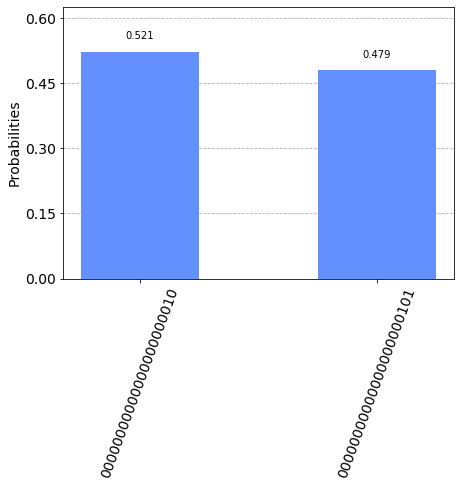

In [14]:
simulator = Aer.get_backend("qasm_simulator")
result = qiskit.execute(circuit, backend = simulator, shots=1000).result()

from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))